In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r"C:\Users\pauli\Downloads\didmiesciai.csv", sep=';')
df2 = pd.read_csv(r"C:\Users\pauli\Downloads\kiti.csv", encoding= 'windows-1257', on_bad_lines='skip', sep=';')
df3 = pd.read_excel(r"C:\Users\pauli\Downloads\vidutiniai.xlsx")


C:\Users\pauli\AppData\Local\Temp\ipykernel_11852\938578285.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"C:\Users\pauli\Downloads\didmiesciai.csv", sep=';')
C:\Users\pauli\AppData\Local\Temp\ipykernel_11852\938578285.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r"C:\Users\pauli\Downloads\kiti.csv", encoding= 'windows-1257', on_bad_lines='skip', sep=';')


In [3]:
df4 = pd.read_csv(r"C:\Users\pauli\Downloads\didmiesciai(1).csv", sep=';')
df5 = pd.read_csv(r"C:\Users\pauli\Downloads\kiti(1).csv", sep=';', encoding= 'windows-1257')
df6 = pd.read_csv(r"C:\Users\pauli\Downloads\vidutiniai.csv", sep=';', encoding= 'windows-1257')

C:\Users\pauli\AppData\Local\Temp\ipykernel_11852\1402984653.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(r"C:\Users\pauli\Downloads\didmiesciai(1).csv", sep=';')
C:\Users\pauli\AppData\Local\Temp\ipykernel_11852\1402984653.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv(r"C:\Users\pauli\Downloads\kiti(1).csv", sep=';', encoding= 'windows-1257')


In [4]:
df1 = df1.dropna(subset=['KWH01'])
df2 = df2.dropna(subset=['KWH01'])
df3 = df3.dropna(subset=['KWH01'])
df4 = df4.dropna(subset=['KWH07'])
df5 = df5.dropna(subset=['KWH07'])
df6 = df6.dropna(subset=['KWH07'])

In [5]:
# df1 = df1.drop(['B', 'C'], axis=1)
# df2 = df2.drop(['B', 'C'], axis=1)
# df3 = df3.drop(['B', 'C'], axis=1)
# df4 = df4.drop(['B', 'C'], axis=1)
# df5 = df5.drop(['B', 'C'], axis=1)
# df6 = df6.drop(['B', 'C'], axis=1)

In [6]:
df_bendra1 = pd.concat([df1, df2, df3], ignore_index=True)
df_bendra2 = pd.concat([df4, df5, df6], ignore_index=True)

In [7]:
df_bendra1 = df_bendra1.drop(['SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA'], axis=1)
df_bendra2 = df_bendra2.drop(['SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA'], axis=1)
dfn1=df_bendra1
dfn2=df_bendra2

In [8]:
df_bendra1 = df_bendra1.groupby('REGIONAS').sum()
df_bendra2 = df_bendra2.groupby('REGIONAS').sum()

In [9]:
df_bendra = pd.merge(df_bendra1, df_bendra2, left_on='REGIONAS', right_on='REGIONAS', how='inner')

In [10]:
df_bendra['metinis'] = df_bendra.iloc[:, 1:].sum(axis=1)

In [11]:
df_bendra = df_bendra[df_bendra['metinis'] > 100]

In [12]:
df_bendra = (df_bendra/1000).round(0).astype(int)

In [13]:
suma = df_bendra.iloc[:, :].sum().reset_index()

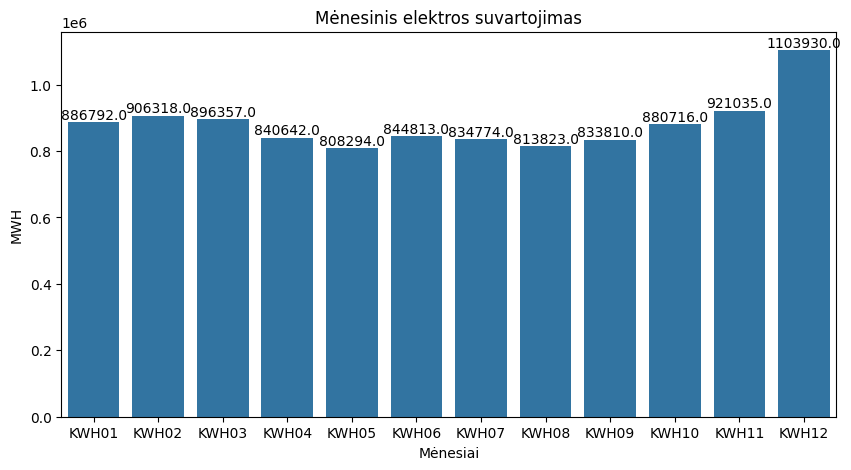

In [14]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='index', y=0, data=suma[:12])
# Add value labels on top of each bar

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # The value of the bar
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='center',  # Alignment
                xytext=(0, 5),  # Vertical offset (move text above the bar)
                textcoords='offset points')
    
plt.title('Mėnesinis elektros suvartojimas')
plt.xlabel('Mėnesiai')
plt.ylabel('MWH')
plt.show()

In [ ]:
df_bendra.head()

,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12,metinis
REGIONAS,,,,,,,,,,,,,
Alytaus regionas,21059,20782,20911,18951,18140,18663,17192,16883,17327,17809,17619,21825,206103
Ignitis INT,43109,79094,61316,65722,56445,55749,56310,55097,58245,61258,68217,86716,704167
Jonavos regionas,9621,10741,9950,9058,8301,8290,8267,8116,8935,9486,9654,12483,103280
Joniškio regionas,4796,4746,5064,4310,4174,4638,5359,5755,5069,5096,5543,6914,56667
Jurbarko regionas,4863,4802,4840,4464,4243,4453,4296,4419,4576,4716,4918,6185,51911


In [16]:
df_bendra = df_bendra.sort_values(by='metinis').reset_index()

In [17]:
kurortai = df_bendra[df_bendra['REGIONAS'].isin(['Palangos regionas'])] 
kurortai = kurortai.drop(columns=['metinis', 'REGIONAS'])
kurortai = kurortai.melt(var_name='menuo', value_name='MWH')

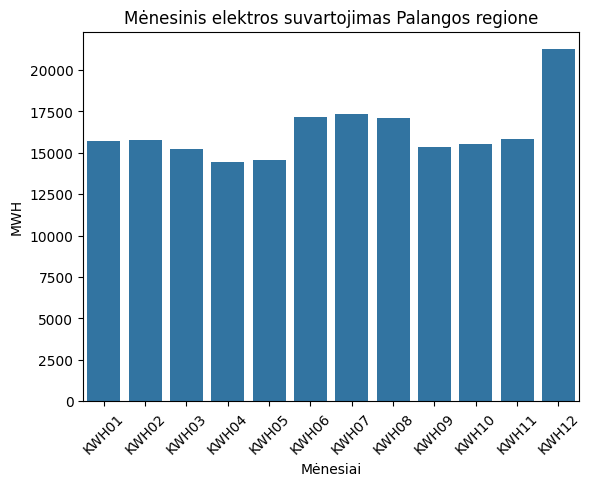

In [18]:
sns.barplot(x='menuo', y='MWH', data=kurortai)
plt.xlabel('Mėnesiai')
plt.xticks(rotation=45) 
plt.title('Mėnesinis elektros suvartojimas Palangos regione')
plt.show()

In [19]:
kurortai

,menuo,MWH
0,KWH01,15741
1,KWH02,15796
2,KWH03,15243
3,KWH04,14473
4,KWH05,14578
5,KWH06,17131
6,KWH07,17343
7,KWH08,17090
8,KWH09,15366
9,KWH10,15537


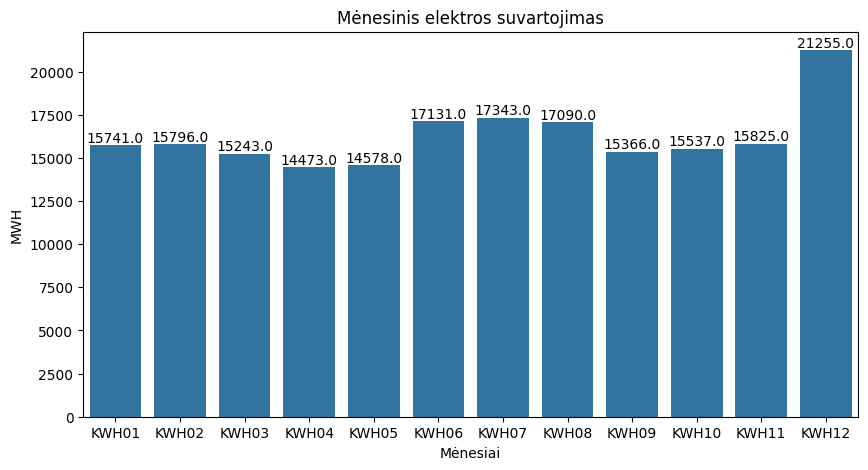

In [20]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='menuo', y='MWH', data=kurortai)
# Add value labels on top of each bar

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # The value of the bar
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='center',  # Alignment
                xytext=(0, 5),  # Vertical offset (move text above the bar)
                textcoords='offset points')
    
plt.title('Mėnesinis elektros suvartojimas')
plt.xlabel('Mėnesiai')
plt.ylabel('MWH')
plt.show()

In [21]:
df_bendra = df_bendra.sort_values(by='metinis').reset_index()

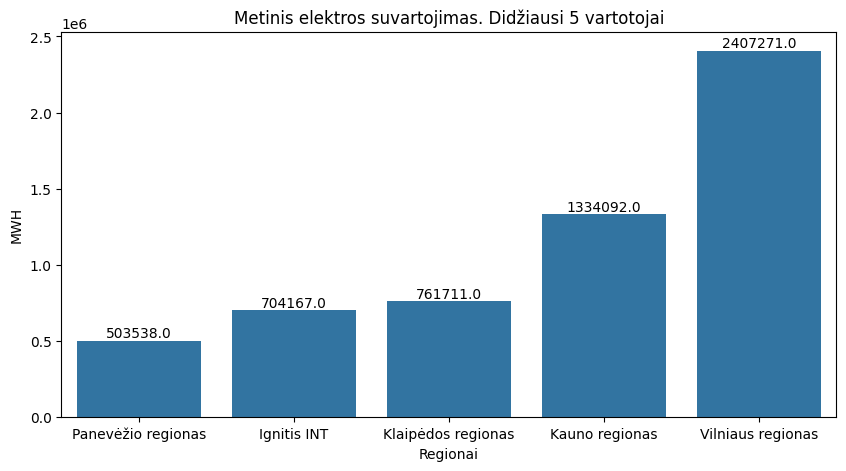

In [22]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='REGIONAS', y='metinis', data=df_bendra.tail(5))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # The value of the bar
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='center',  # Alignment
                xytext=(0, 5),  # Vertical offset (move text above the bar)
                textcoords='offset points')
    
plt.title('Metinis elektros suvartojimas. Didžiausi 5 vartotojai')
plt.xlabel('Regionai')
plt.ylabel('MWH')
plt.show()

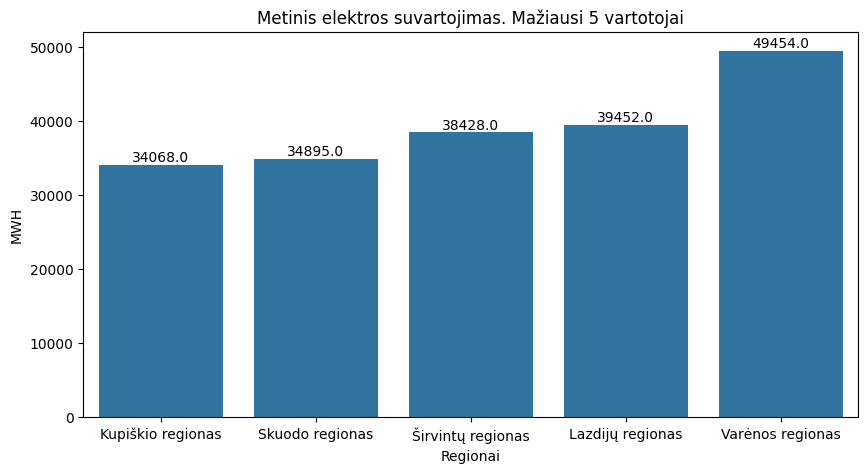

In [23]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='REGIONAS', y='metinis', data=df_bendra.head(5))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # The value of the bar
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='center',  # Alignment
                xytext=(0, 5),  # Vertical offset (move text above the bar)
                textcoords='offset points')
    
plt.title('Metinis elektros suvartojimas. Mažiausi 5 vartotojai')
plt.xlabel('Regionai')
plt.ylabel('MWH')
plt.show()

In [24]:
print(len(dfn1))

2325766


In [25]:
dfn1['metinis'] = dfn1.iloc[:, 1:].sum(axis=1)
dfn2['metinis'] = dfn2.iloc[:, 1:].sum(axis=1)

In [26]:
print(len(dfn1))

2325766


In [27]:
dfn1 = dfn1.sort_values(by='metinis')
dfn2 = dfn2.sort_values(by='metinis')

In [28]:
print(len(dfn1))

2325766


In [29]:
dfn1 = dfn1[dfn1['metinis'] > 100]
dfn2 = dfn2[dfn2['metinis'] > 100]

In [30]:
print(len(dfn1))

1539227


In [31]:
dfn1[dfn1.select_dtypes(include=['number']).columns] = (dfn1.select_dtypes(include=['number']) / 1000).round(0).astype(int)
dfn2[dfn2.select_dtypes(include=['number']).columns] = (dfn2.select_dtypes(include=['number']) / 1000).round(0).astype(int)

In [32]:
print(len(dfn1))

1539227


In [33]:
dfn1=dfn1.drop_duplicates()
dfn2=dfn2.drop_duplicates()

In [34]:
print(len(dfn1))

68341


In [35]:
dfn1.tail()

,REGIONAS,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06,metinis
1599310,Marijampolės regionas,1906,1735,1901,1806,1507,1949,10804
571754,Klaipėdos regionas,2338,1629,1514,2116,2432,2183,12210
2142854,Panevėžio regionas,3514,3214,3402,3436,3676,3615,20857
4,Vilniaus regionas,3459,3390,3657,3631,3591,3699,21427
571753,Klaipėdos regionas,4095,3832,4359,4200,3808,3910,24205


In [36]:
dfn2.tail()

,REGIONAS,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12,metinis
578056,Klaipėdos regionas,2538,2086,1941,1943,1693,1631,11832
578055,Klaipėdos regionas,2713,2165,1825,1757,1694,1709,11864
2151323,Panevėžio regionas,3538,3606,3400,3681,3266,3528,21019
2,Vilniaus regionas,4047,3941,3819,3914,3877,3998,23597
578050,Klaipėdos regionas,4008,3810,3935,4042,3955,4190,23940


In [37]:
data = {1:-3.4, 2:-5.7, 3:1.6, 4:5.9, 5:11.1, 6:19.2, 7:22.1, 8:16.1, 9:11.4, 10:8.3, 11:4, 12:-3.3}

df_orai = pd.DataFrame(list(data.items()), columns=['menesis', 'temperatura'])

print(df_orai)

    menesis  temperatura
0         1         -3.4
1         2         -5.7
2         3          1.6
3         4          5.9
4         5         11.1
5         6         19.2
6         7         22.1
7         8         16.1
8         9         11.4
9        10          8.3
10       11          4.0
11       12         -3.3


In [38]:
df_orai['elektra']=list(suma[0][:12])

In [39]:
print(df_orai)

    menesis  temperatura  elektra
0         1         -3.4   886792
1         2         -5.7   906318
2         3          1.6   896357
3         4          5.9   840642
4         5         11.1   808294
5         6         19.2   844813
6         7         22.1   834774
7         8         16.1   813823
8         9         11.4   833810
9        10          8.3   880716
10       11          4.0   921035
11       12         -3.3  1103930


In [40]:
correlation = df_orai['temperatura'].corr(df_orai['elektra'])

In [41]:
correlation

np.float64(-0.6407846768530763)

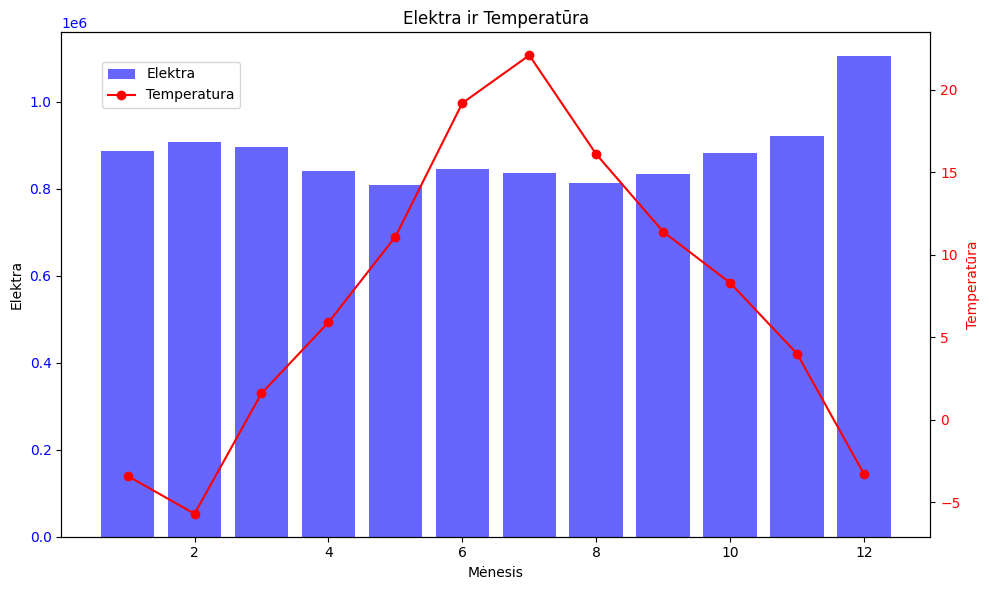

In [42]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(df_orai['menesis'], df_orai['elektra'], color='blue', alpha=0.6, label='Elektra')
ax1.set_xlabel('Mėnesis')
ax1.set_ylabel('Elektra')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df_orai['menesis'], df_orai['temperatura'], color='red', marker='o', label='Temperatura')
ax2.set_ylabel('Temperatūra', color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Elektra ir Temperatūra')
plt.tight_layout()
plt.show()

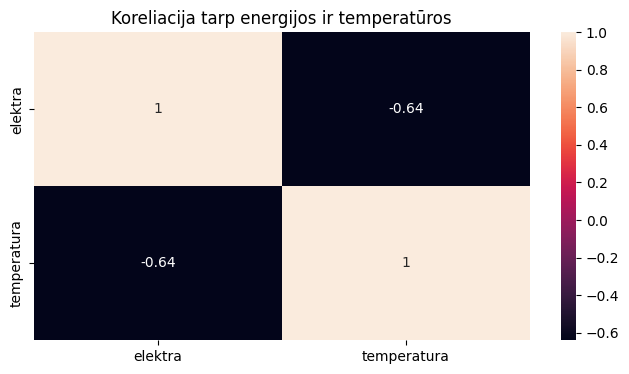

In [43]:
fig, axes = plt.subplots(figsize=(8,4))
sns.heatmap(data=df_orai[['elektra','temperatura']].corr(), annot=True)
plt.title('Koreliacija tarp energijos ir temperatūros')
plt.show()

In [44]:
df_orai

,menesis,temperatura,elektra
0,1,-3.4,886792
1,2,-5.7,906318
2,3,1.6,896357
3,4,5.9,840642
4,5,11.1,808294
5,6,19.2,844813
6,7,22.1,834774
7,8,16.1,813823
8,9,11.4,833810
9,10,8.3,880716
